### Author: Babaniyi Olaniyi
#### Tasks
1. Determine the relationship between a song being "explicit" and its other characteristics...
2. Build a song recommender system

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
del df['Unnamed: 0']
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


### 1. Relationship between audio characteristics

To determine the relationships between audio characteristics, we use the pearson product moment correlation and the strength of the relationship is visualized in the chart below.

#### Insights
1. **Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

    - It is strongly related with acousticness (-0.77). The more energetic a song is, the less acoustic it is.
    - As expected, energy is positively related with popularity (0.48). The more energetic a song is, the more popular the song will be, this is expected since energetic songs are fast, loud and danceable.


2. **Popularity:**
    - It has a strong negative relationship with acousticness (-0.61).  In other words, the more acoustic a song is, the less popular it will be. This is because songs with high 'acousticness' consists mostly of natural acoustic sounds (acoustic guitar, piano, orchestra, the unprocessed human voice), and are not energetic hence they may not be popular.
    
    - It is negatively related to instrumentalness (-0.31). Same as acoustic songs, the more instruments used in a song, the less popular it will be. Generally speaking, only a small proportion of people appreciate solemn songs, people tend to only listen to these songs when during special periods such as during or after heartbreaks, meditation and so on (i may be wrong here though).

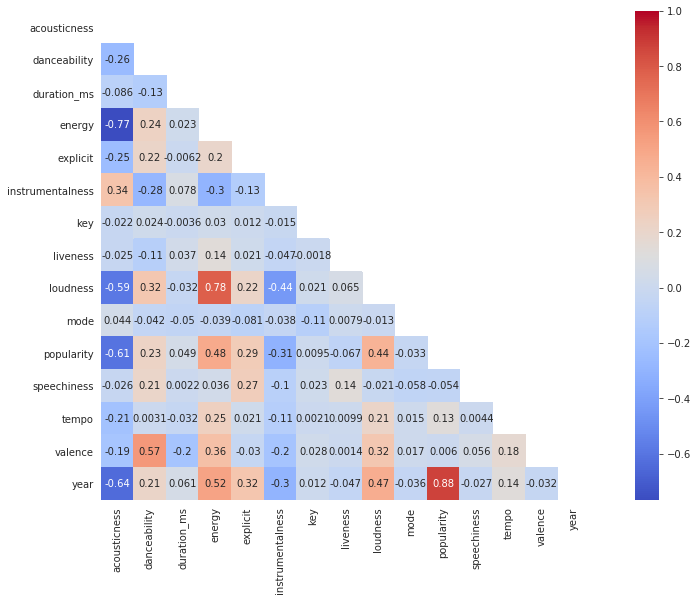

In [3]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 9))
    ax = sns.heatmap(corr, mask=mask, square=True,cmap="coolwarm", annot = True)

### Relationship between a song being **explicit** and its other characteristics...

The correlation between a song being explicit and other characteristics are not really strong. However, there's a positive relationship between a song being explicit and being danceable, loud, energetic, popular and speechy.
This is further explained in the following graphs.

In [4]:
exp = df.corr()['explicit']
exp

acousticness       -0.247950
danceability        0.218975
duration_ms        -0.006216
energy              0.200190
explicit            1.000000
instrumentalness   -0.127075
key                 0.011627
liveness            0.021441
loudness            0.219321
mode               -0.081413
popularity          0.288192
speechiness         0.268731
tempo               0.021392
valence            -0.030064
year                0.324760
Name: explicit, dtype: float64

Interestingly, we see that explicit songs has been popular since the late 1950s and dipped a bit in the late 19070s, however the popularity has been steady since 1980s.

We also see that loud songs has been steady since 1980s.

Text(0.5, 0, 'Year')

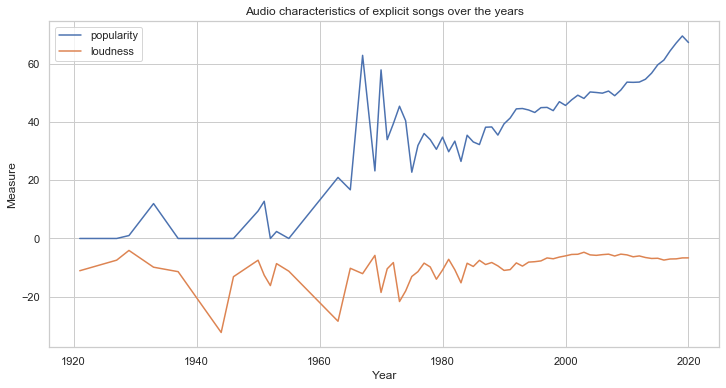

In [5]:
df_exp = df[(df.explicit == 1)]
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
columns = ["popularity","loudness"]
for col in columns:
    x = df_exp.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics of explicit songs over the years')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

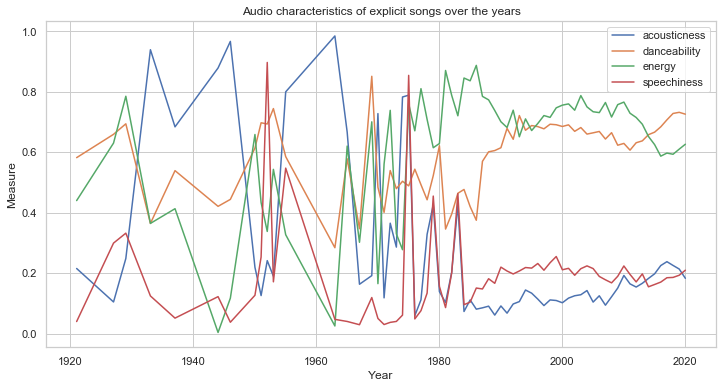

In [6]:
df_exp = df[(df.explicit == 1)]
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness"]
for col in columns:
    x = df_exp.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics of explicit songs over the years')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

#### The bar plot below shows the number of explicit songs released per year. 
We see that the number of explicit songs has been increasing ever since but it dipped in the early 2000s. Also, the highest number of explicit songs was released in 2018.


Text(0.5, 0, 'Year')

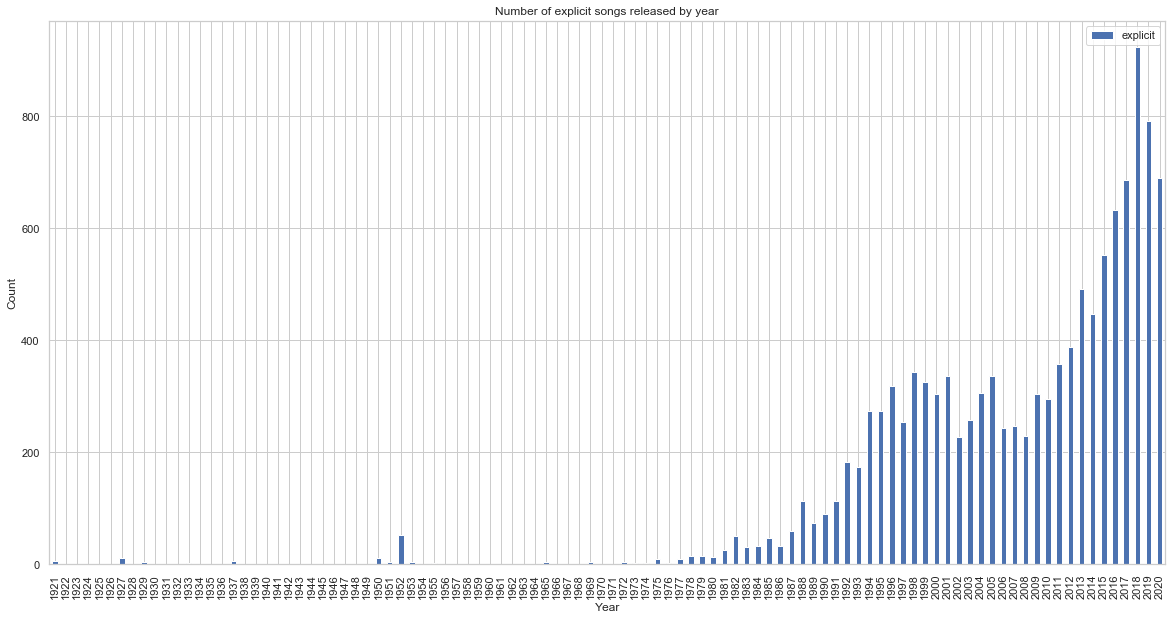

In [7]:
# How has explicit song evolved over the years
explicit = pd.DataFrame(df.groupby('year')['explicit'].sum())
explicit = explicit.reset_index()
#explicit = explicit.sort_values('explicit', ascending = False)

ax = explicit.plot.bar(x='year', y='explicit', figsize=(20,10))
ax.set_title('Number of explicit songs released by year')
ax.set_ylabel('Count')
ax.set_xlabel('Year')


#### The top 10 most popular explicit songs were released between 2018 and 2020 and they are:
 - The Box by Roddy Rich
 - Toosie slide by Drake
 - Say so by Doja Cat
 - Rockstar by DaBaby ft. Roddy Tich
 - Supalonely by Benee aft Gus Dapperton
 - Blueberry Faygo by Lil Mosey
 - Roxanne by Arizona Zervas
 - Safaera by Bad Bunny, Jowel & Randy Nengo
 - Sicko mode by Travis Scott

In [8]:
# Most popular explicit artists and artists
df_exp.sort_values(by ='popularity', ascending=False)[:10]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9772,0.10400,['Roddy Ricch'],0.896,196653,0.586,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,97,2019-12-06,0.0559,116.971,0.642,2019
9874,0.32100,['Drake'],0.834,247059,0.454,1,127QTOFJsJQp5LbJbu3A1y,0.000006,1,0.1140,-9.750,0,Toosie Slide,97,2020-04-03,0.2010,81.618,0.837,2020
9872,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,97,2020-04-24,0.0514,129.979,0.280,2020
9774,0.25600,['Doja Cat'],0.787,237893,0.673,1,3Dv1eDb0MEgF93GpLXlucZ,0.000004,11,0.0904,-4.577,0,Say So,96,2019-11-07,0.1580,110.962,0.786,2019
9873,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),96,2020-04-17,0.1640,89.977,0.497,2020
9779,0.30500,"['BENEE', 'Gus Dapperton']",0.863,223480,0.631,1,4nK5YrxbMGZstTLbvj6Gxw,0.000030,7,0.1230,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019
9876,0.20700,['Lil Mosey'],0.774,162547,0.554,1,6wJYhPfqk3KGhHRG76WzOh,0.000000,0,0.1320,-7.909,1,Blueberry Faygo,94,2020-02-07,0.0383,99.034,0.349,2020
9777,0.05220,['Arizona Zervas'],0.621,163636,0.601,1,696DnlkuDOXcMAnKlTgXXK,0.000000,6,0.4600,-5.616,0,ROXANNE,94,2019-10-10,0.1480,116.735,0.457,2019
9908,0.01030,"['Bad Bunny', 'Jowell & Randy', 'Nengo Flow']",0.607,295177,0.829,1,2DEZmgHKAvm41k4J3R2E9Y,0.000000,2,0.1070,-4.074,1,Safaera,93,2020-02-28,0.3790,96.172,0.685,2020
9673,0.00513,['Travis Scott'],0.834,312820,0.730,1,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,SICKO MODE,93,2018-08-03,0.2220,155.008,0.446,2018


## 2. Recommender System using song titles


Recommender systems can be broadly classified into Content-based filtering and Collaborative-filtering systems. Content-based systems generate recommendations based on product attributes (or any data available in the form of objects, for example, blog posts in the case of content-sites) while collaborative-filtering generates recommendations based on user behavior.

In our case, we have features as song name, artists and other song characteristics, so we simply apply a TF-IDF approach which will convert text values into numerical values basically producing a high dimensional vector. When we produced a vector space, we use cosine distance measures to find the similarity between song titles and rank them according to the minimum distance.

**Why do I use Content-based Filtering for recommendation?**

I used it because collaborative-filtering needs quality user activity such as users preferences (e.g. ratings of songs or artists, genre of songs played) for generating recommendations but we don't have this information in the data and quality recommendations are needed to encourage users to use spotify hence i used songs titles to build a recommender system.

### Techniques used
1. **I used TF-IDF for topic modelling:** TF-IDF is a measure of originality of a word by comparing the number of times a word appears in a song title with the number of song titles the word appears in.

$$ TF-IDF = TF(t, d) * IDF(t) $$

where:

    - TF(t, d) is the term frequency and represents the numbert of times term **t** appear in a song title **d**

    - IDF(t) is the inverse document frequency

    $$ IDF(t) =log \frac{1 + n}{1 + df(d, t)} + 1$$

    - n is the number of song titles

2. **Popularity:** I used only songs with a popularity score >= 25 to build the recommender system. This is done to avoid a memory error in jupyter notebook and also to recommend songs that are a bit well-known.


3. **Data cleaning:** I removed stopwords such as a, the, in, etc. from each song title


4. **Similarity measure:** I used cosine similarity to determine the similarity between song titles. Other measures that may be used are euclidean distance or Pearson's correlation.


In [9]:
#________Importing important libraries
from sklearn.feature_extraction.text import TfidfVectorizer # get the term frequency and inverse document frequency for calculating similarity scores

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

#__________ Clean song titles by removing numbers
def clean_text(df, text_field, new_text_field):
    df[new_text_field] = df[text_field].str.lower()
    df[new_text_field] = df[new_text_field].apply(lambda elem: ''.join([i for i in elem if not i.isdigit()]))  
    return df

df = clean_text(df,'name','new_name')

#_________Dropping songs with less popularity score <25
songs_10 = df[df['popularity']>= 25]

#__________build book-title tfidf matrix
tfidf_matrix = vectorizer.fit_transform(songs_10['new_name'])

#tfidf_feature_name = vectorizer.get_feature_names()
tfidf_matrix.shape


(107835, 166001)

In [10]:
#______computing cosine similarity matrix using linear_kernel of sklearn
from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

songs_10 = songs_10.reset_index(drop=True)
indices = pd.Series(songs_10['new_name'].index)

In [11]:
#_________Function for Cosine Similarity
def recommend_cosine(index):
    id = indices[index]
    # Get the pairwise similarity scores of all songs compared that song,
    # sorting them and getting top 10
    similarity_scores = list(enumerate(cosine_similarity[id]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[2:12]
    
    #Get the books index
    songs_index = [i[0] for i in similarity_scores]
    
    #Return the top 5 most similar books using integer-location based indexing (iloc)
    return songs_10.iloc[songs_index]

#### If we want a song similar to "Chattanooga Choo Choo" below:

In [12]:
songs_10.iloc[150]
#songs_10.loc[songs_10['id']== ""]

acousticness                         0.947
artists                   ['Glenn Miller']
danceability                         0.588
duration_ms                         206800
energy                               0.312
explicit                                 0
id                  7a5VuzvBrtbqYT7kNlQlFd
instrumentalness                  2.07e-05
key                                      5
liveness                             0.445
loudness                           -10.461
mode                                     1
name                 Chattanooga Choo Choo
popularity                              43
release_date                          1939
speechiness                          0.074
tempo                              144.768
valence                              0.639
year                                  1939
new_name             chattanooga choo choo
Name: 150, dtype: object

#### These are the songs our recommender system suggest to us:

In [13]:
#input the index of the song and it will recommend 10 songs
recommend_cosine(150)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,new_name
60510,0.58800,['Harpers Bizarre'],0.542,154840,0.7790,0,0Yi33sItO0TVjIiD5hCrGe,0.000000,0,0.5020,-9.073,1,Chattanooga Choo Choo - Remastered Version,32,1967,0.0685,130.348,0.752,1967,chattanooga choo choo - remastered version
60599,0.13900,['The Box Tops'],0.683,170827,0.5030,0,1aR9HTokyIrreiVGXnhvyF,0.000000,5,0.0763,-13.166,1,Choo Choo Train,30,1968,0.0295,112.745,0.941,1968,choo choo train
75847,0.11200,['Fetty Wap'],0.893,176855,0.6460,1,7s49Um7G06hq2rulrHPsIy,0.000000,11,0.1040,-5.073,0,Jimmy Choo,55,2016-02-05,0.1000,132.970,0.468,2016,jimmy choo
76851,0.08890,['Alvin Stardust'],0.593,165720,0.9110,0,4LDjgf7egcQGxeGRjEfrSk,0.000004,5,0.1760,-7.954,0,My Coo Ca Choo,40,1974,0.1680,132.367,0.560,1974,my coo ca choo
103175,0.00213,['Eric Church'],0.674,202493,0.8150,0,4Ye5LohYYu6b2JjO25OWlQ,0.000299,7,0.0781,-7.718,1,Chattanooga Lucy,50,2015-11-11,0.0364,110.937,0.559,2015,chattanooga lucy
0,0.98400,"['Louis Armstrong', 'Earl Hines']",0.831,161933,0.2620,0,3eMrYc092k7SIJfWJ7oasR,0.912000,8,0.2040,-12.386,1,Weather Bird,43,1923,0.0942,104.606,0.901,1923,weather bird
1,0.99600,['Bessie Smith'],0.614,177133,0.0423,0,2wAfHM7Whz67VFbdanhZlk,0.002930,4,0.1830,-12.033,1,Nobody Knows You When You're Down and Out,45,1923,0.0535,89.822,0.211,1923,nobody knows you when you're down and out
2,0.99600,['Bessie Smith'],0.537,206600,0.0443,0,2AZgaYZSwUosJD71J2N2Zo,0.000265,3,0.1520,-16.474,0,'Tain't Nobody's Bizness If I Do,30,1923,0.0343,80.468,0.137,1923,'tain't nobody's bizness if i do
3,0.97600,['Louis Armstrong'],0.665,192600,0.2540,0,7lRFR5GJCxK87ZbVMtQSeS,0.002170,8,0.6440,-9.879,1,Ain't Misbehavin',33,1923,0.1080,125.734,0.503,1923,ain't misbehavin'
4,0.98600,['Bessie Smith'],0.771,201480,0.0905,0,0V1iYWPXCBTaB6dhbiprGF,0.000141,3,0.1520,-7.788,1,Send Me to the 'Lectric Chair,27,1923,0.0613,87.571,0.601,1923,send me to the 'lectric chair


#### Yeah! Our Recommender system works!


From the above, we ask the recommendation system to recommend songs for us based on the song title. We see that the recommender majorly recommends songs with similar titles. 


For instance, from the above we ask it to recommend songs similar to **Chattanooga Choo Choo**, these are the songs it recommends:

1. Chattanooga Choo Choo - Remastered Version
2. Choo Choo Train
3. Jimmy Choo
4. My Coo Ca Choo
5. Chattanooga Lucy	
6. Weather Bird	
7. Nobody Knows You When You're Down and Out
8. 'Tain't Nobody's Bizness If I D
9. Ain't Misbehavin'
10. Send Me to the 'Lectric Chair

In real-life, this may not necessarily be so as a user may like a variety of music hence a song recommender system using song-title may not be the best. 

#### PROS
- Can recommend songs even if we don't have information about the user.
- Can recommend songs without waiting for users' preferences.

#### CONS
- The recommendation won't be surprising since they are made by looking at titles only

#### WAYS TO IMPROVE
- Including the lyrics of each song will certainly improve this recommender system.

